<h1>Recurrent Neural Network <b>(RNN)</b></h1>

<h3>1. Basic architecture:</h3>

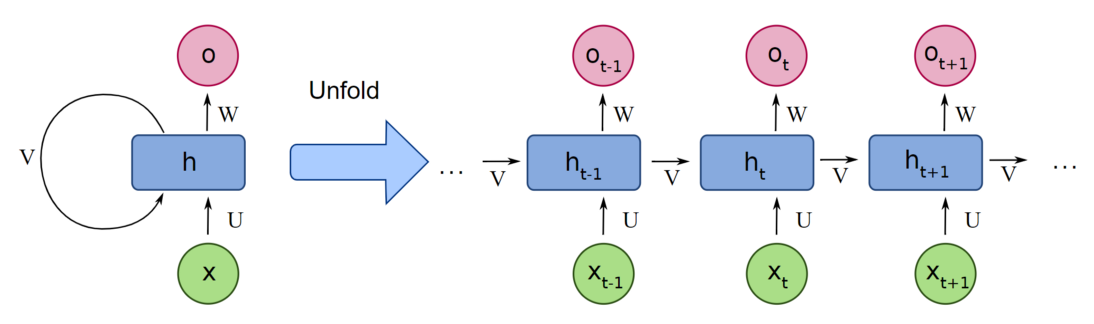
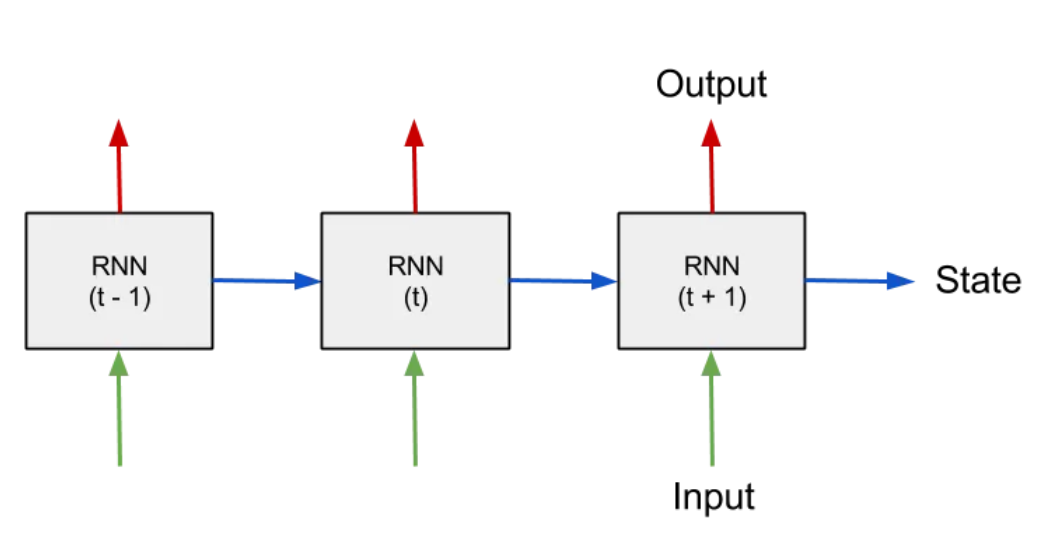


\begin{equation*}
    h_t = f(h_{t-1},x_t) = \textrm{tanh} \left( \Theta_h h_{t-1} + \Theta_x x_t + b \right)
\end{equation*}


<h3>2. Types:</h3>

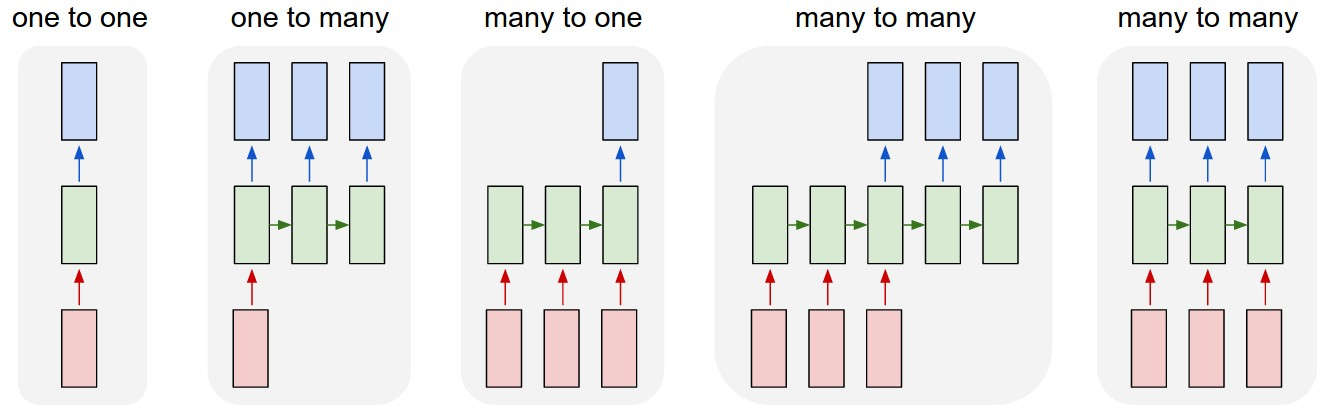
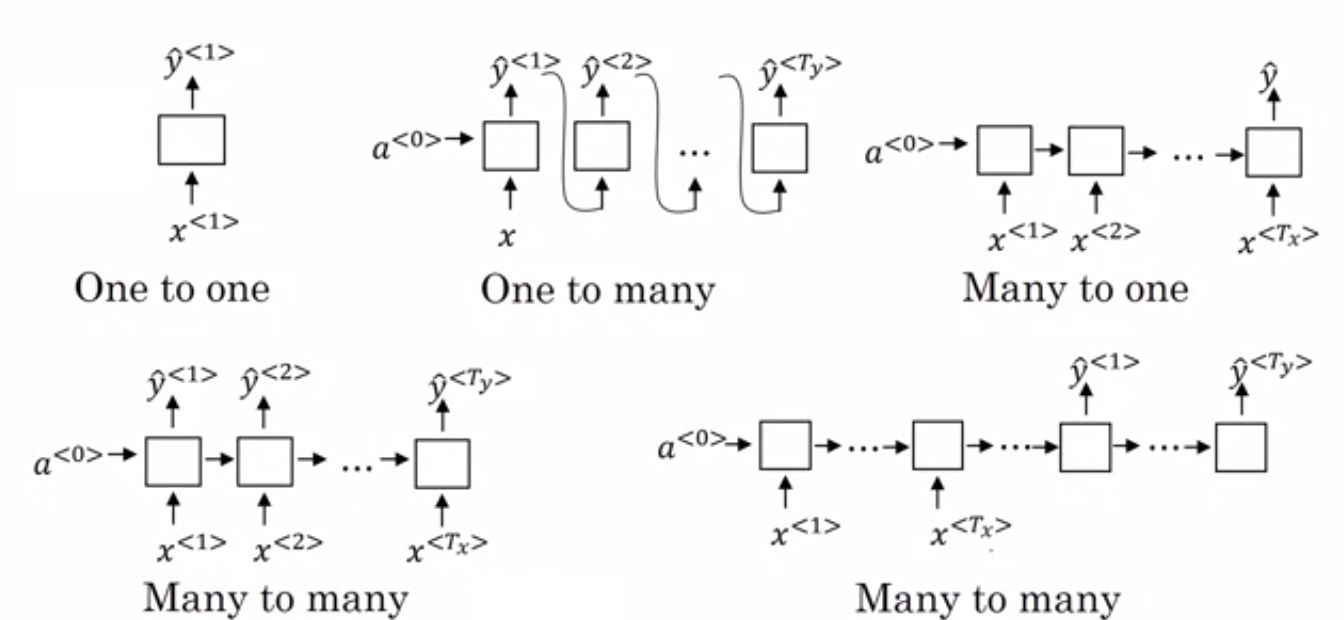
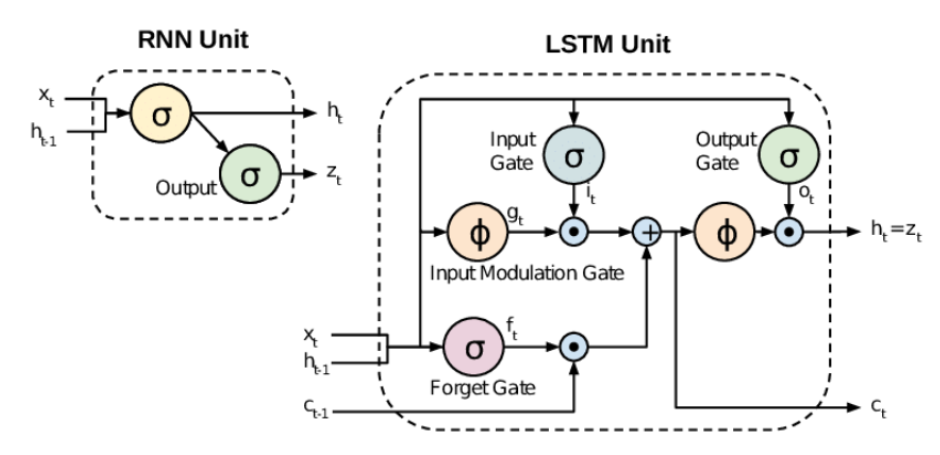
* <b>Many-to-one</b> ~ analyzing input sequence of data, returning one value np.: text analyzing,
* <b>Many-to-many (seq2seq)</b> ~ analyzing input sequence of data, returning other sequance np.: text translation,
* <b>One-to-many</b> ~ produced new sequence of data based on one input scalara value np.: generating description of the image.

<h3>Problems:</h3>

* vanishing/ exploding gradient,

To eliminate this problem we are using these upgrades:
* <b>context vector $c_t$</b> - additional memory that contains bigger context (ex.: information about sex of a person) until it's needed.
* <b>gates</b> - parameters used to modify the way of creating $h_t$:
    * *upadate_gate* - making decision about how long to be depended from temporary data during the *hidden_state* update $h_t$ or $c_t$,
    * *forget_date* or *reset_gate* - making decision about what data need to be vanished from the memory (if to have zeroed $c_t$ or $h_t$),
    * *output_gate* - making decision about how strong to rely on the $c_t$ context during update of $h_t$

<h3>Examples of using gates:</h3>

Examples of modyfied RNN web is <b>GRU (Gated Recurrent Unit = are using update_get and reset_gate)</b> and <b>LSTM (Long Short-Term Memory = are using all gates and memory with bigger context $c_t$)</b>.

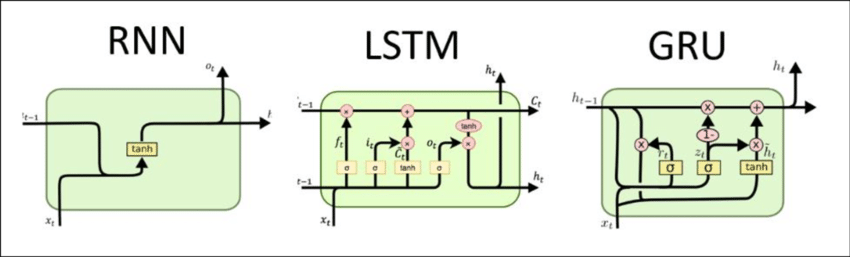
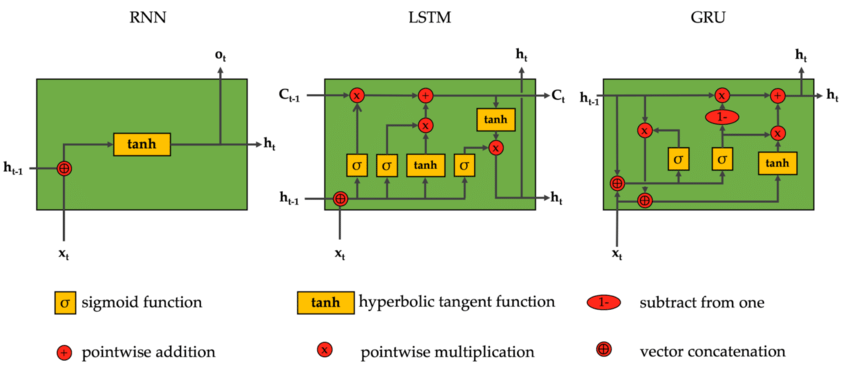
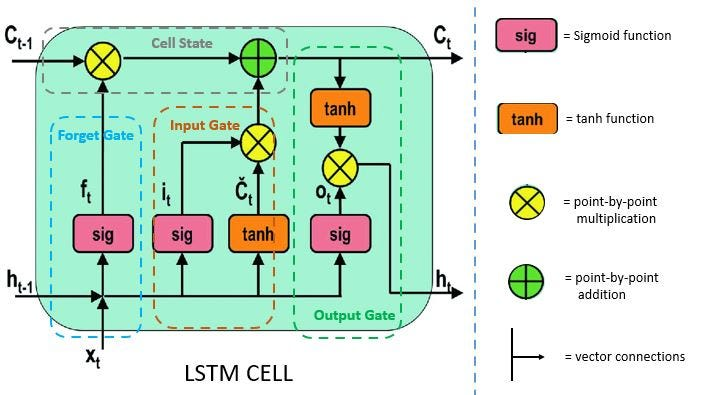

<h3><b>ATTENTION!: </b></h3>

Additional feature of upgraded RNN's was <b>atention</b>, decision system about what parameters/ data are the most important and valuable during the current prediction (this step) ex.: which word is the most important.

System based on attentions created systems like <b>BERT</b> and <b>GPT</b> that are based on <b>TRANSFORMERS</b> that are responsible for NLP (Natural Language Processing) = text analysis and human speech ex.:

* text translation,
* filling missing parts of the words, text generation,
* voice and text recognition (OCR),
* making summaries of long texts, sentiment searching.

<h3> Implementation of simple RNN network (CharRNN) used to text generation char after char by using Python and PyTorch library:</h3>

In [106]:
import numpy as np
import torch
import wget
import os

In [107]:
if not os.path.exists("utils/plants.data"):
    wget.download("https://raw.githubusercontent.com/Argenni/GUiAO_lab/main/utils/plants.data", out="utils/plants.data")
with open("utils/plants.data", "r") as f:
    data_raw = [s.strip() for s in f.readlines()]
data_lines = []
for data_line in data_raw:
    data_split = data_line.split(",")
    data_lines.append([*data_split[0]+"\n"])
input_text = sum(data_lines,[])
print("Readed text: ")
print(input_text[0:20])
characters = sorted(set(input_text))
print(f"Characters: {characters}")

Readed text: 
['a', 'b', 'e', 'l', 'i', 'a', '\n', 'a', 'b', 'e', 'l', 'i', 'a', ' ', 'x', ' ', 'g', 'r', 'a', 'n']
Characters: ['\n', ' ', '-', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [108]:
char_to_num = { char:index for index,char in enumerate(characters) }
num_to_char = { index:char for index,char in enumerate(characters) }
print(f"Example text: {input_text[0:20]}")
print(f"Characters: {characters}")
print(f"Char to number: {char_to_num}")
print(f"Number to char: {num_to_char}")

Example text: ['a', 'b', 'e', 'l', 'i', 'a', '\n', 'a', 'b', 'e', 'l', 'i', 'a', ' ', 'x', ' ', 'g', 'r', 'a', 'n']
Characters: ['\n', ' ', '-', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Char to number: {'\n': 0, ' ': 1, '-': 2, '.': 3, 'a': 4, 'b': 5, 'c': 6, 'd': 7, 'e': 8, 'f': 9, 'g': 10, 'h': 11, 'i': 12, 'j': 13, 'k': 14, 'l': 15, 'm': 16, 'n': 17, 'o': 18, 'p': 19, 'q': 20, 'r': 21, 's': 22, 't': 23, 'u': 24, 'v': 25, 'w': 26, 'x': 27, 'y': 28, 'z': 29}
Number to char: {0: '\n', 1: ' ', 2: '-', 3: '.', 4: 'a', 5: 'b', 6: 'c', 7: 'd', 8: 'e', 9: 'f', 10: 'g', 11: 'h', 12: 'i', 13: 'j', 14: 'k', 15: 'l', 16: 'm', 17: 'n', 18: 'o', 19: 'p', 20: 'q', 21: 'r', 22: 's', 23: 't', 24: 'u', 25: 'v', 26: 'w', 27: 'x', 28: 'y', 29: 'z'}


In [109]:
embedded_text = [char_to_num[char] for index,char in enumerate(input_text)]
embedded_text = torch.tensor(embedded_text)
print("Afer encoding: ")
print(embedded_text[0:20])
embedded_text = torch.unsqueeze(embedded_text, dim=1)

Afer encoding: 
tensor([ 4,  5,  8, 15, 12,  4,  0,  4,  5,  8, 15, 12,  4,  1, 27,  1, 10, 21,
         4, 17])


<h3> Implementing RNN web:</h3>

Architecture:

* First block = `torch.nn.Embedding` is like $One-Hot-Encoding$, parameters:
    * `num_embeddings` = `input_size`,
    * `embedding_dim` = `input_size`,
* Second block = `torch.nn.lstm` needs parameters like:
    * `input_size` - dimension of dataset,
    * `hidden_size` - size of hidden state,
    * `num_layers` - number of layers = const 3,
* Third block = `nn.Linear` - size/ dimension of input data = dimension of hidden_stat

In [110]:
class RNN(torch.nn.Module):
    """
    Implementation of RNN web: Embedding -> LSTM -> Linear
    """
    def __init__(self, input_size, hidden_size, output_size):
        """
        Parameters:
        - input_size ~ size of on the first layer embeddings (for OHE = number of letters in dicitonary),
        - hidden_size ~ length of remebered hidden state,
        - output_size ~ number of neurons on the last output linear layer = number of latters in dictionary.
        """
        super().__init__()
        self.encoder = torch.nn.Embedding(
            num_embeddings=input_size,
            embedding_dim=input_size
        )
        self.lstm = torch.nn.LSTM(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=3
        )
        self.decoder = torch.nn.Linear(
            in_features=hidden_size, 
            out_features=output_size
        )
    
    def forward(self, X, hidden_state=None):
        """
        Parameters:
        - X - input_data, shape=(sequence_len, input_size),
        - hidden_state ~ optional initialization data our LSTM, torch.tensor shape=(num_layers, batch_size, hidden_size)
        """
        X = self.encoder(X)
        output, hidden_state = self.lstm(X, hidden_state)
        output = self.decoder(output)
        return output, hidden_state 

<h3> Text generation: </h3>

In [111]:
def generate_text_embedding(sequence_size, rnn, char_to_num):
    """
    Generating text, char after char (indices form/ char_to_num)by using RNN
    """
    # 1. Setting up prediction mode/ evaluation.
    rnn.eval()
    input_sequence = torch.tensor(char_to_num["\n"]).reshape(1, -1)
    output_sequence = []
    hidden_state = None
    newline_counter = 0 # STOP POINT
    char_counter = 0
    while True:
        # 2. Generating sequence of chars by using RNN web.
        prediction, hidden_state = rnn(input_sequence, hidden_state)
        
        # 3. Output data normalizing by using soft-max function.
        prediction = torch.nn.functional.softmax(torch.squeeze(prediction), dim=0)
        
        # 4. Defining the probability of the next char.
        distribution = torch.distributions.Categorical(torch.squeeze(prediction))
        
        # 5. Sampling from these - new char.
        output=distribution.sample()
        
        # 6. Saving new index to output_sequence.
        output_sequence.append(output.item())
        
        input_sequence[0][0]=output.item()
        char_counter=char_counter+1
        if(output.item()==char_to_num["\n"]): newline_counter = newline_counter + 1
        if(newline_counter>=2): break
        if(char_counter > sequence_size): break
    return output_sequence

<h3>Embedding sequance of indices to simple string:</h3>

In [112]:
def embedding_to_string(sequence_embeddings, num_to_char):
    """
    Replacing generated sequance of indices list to simple string.
    """
    gen = [num_to_char[index] for index in sequence_embeddings]
    text = ""
    text = text.join(gen)
    return text

In [113]:
rnn = RNN(len(num_to_char), 512, len(num_to_char))
rnn = rnn.double()
text_embedding_text = generate_text_embedding(4, rnn, char_to_num)
print(f"Example of generated text (without training):")
print(text_embedding_text)
text_test = embedding_to_string([4, 5, 6, 7], num_to_char)
print("Test text decoded from indices: 4, 5, 6, 7:")
print(text_test)

Example of generated text (without training):
[2, 26, 22, 17, 8]
Test text decoded from indices: 4, 5, 6, 7:
abcd


<h3>Training LSTM:</h3>

In [114]:
def train_LSTM(dataset, sequence_size, num_to_char, char_to_num):
    """
    Training LSTM (Long-Short Term memory).
    """
    rnn = RNN(
        input_size=len(num_to_char), 
        hidden_size=512, 
        output_size=len(num_to_char)
    )
    rnn = rnn.double()
    optimizer = torch.optim.Adam(rnn.parameters(), lr=0.002)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(700): 
        rnn.train()
        start_idx = np.random.randint(dataset.shape[0]-sequence_size)
        input_sequence = dataset[start_idx : start_idx+sequence_size]
        val_sequence = dataset[start_idx+1 : start_idx+sequence_size+1]
        hidden_state = None
        pred, hidden_state = rnn(input_sequence, hidden_state)
        loss = criterion(torch.squeeze(pred), torch.squeeze(val_sequence))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch%100==0):
            print(f"Epoch: {epoch} , cumulative loss: {loss}") 
            output_sequence = generate_text_embedding(sequence_size, rnn, char_to_num)
            print(embedding_to_string(output_sequence, num_to_char))
    return rnn

<h3>Training:</h3>

In [115]:
sequence_size = 150
rnn = train_LSTM(
    dataset=embedded_text,
    sequence_size=sequence_size,
    num_to_char=num_to_char,
    char_to_num=char_to_num
)

Epoch: 0 , cumulative loss: 3.3865204627960375
beemezgydc-rsyf ezpguttqfsbnadakaic-n
-nmylgw

Epoch: 100 , cumulative loss: 2.4162442204827115
sspa ehecsnmss
jsley

Epoch: 200 , cumulative loss: 2.4459577913676567
cufdadha
cligegimius clil cerii var. priiphhenpoldia

Epoch: 300 , cumulative loss: 2.219105185286134
jivariferifoni
s

Epoch: 400 , cumulative loss: 2.1812794939550244
klithulgiellia polreridoglintans ssp. holentrloalenmceasthes vsr. acancimomioliata
pevorrqa cerhiula

Epoch: 500 , cumulative loss: 2.5442587258708937
pudeemex argella
arqifolium

Epoch: 600 , cumulative loss: 1.9963627709561251
sdhalix insropox ssp. s starumjata ssp. ennomooota var. libinginicus
eiphese ariosota



<h3>Pytania kontrolne: </h3>

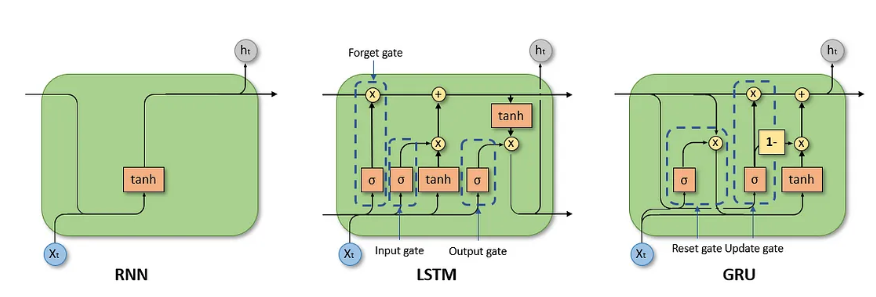

<b>1. Na czym polega działanie rekurencyjnych sieci neuronowych?</b>

Odp.: Rekurencjne sieci neuronowe (RNN) używają wcześniejszych dany (ht-1) oraz bieżących do wykonywania predykcji. Wyróżniamy trzy rodzaje/ architektury ich: jeden-do-wielu, wiele-do-jeden oraz wiele-do-wielu. Żeby ulepszyć działanie RNN zostały użyte nowe elementy takie jak:
- wektor kontekstu, które przechowuje dodatkowe informacje np.: o płci,
- bramki (gates) - współczynnik modyfikujące hidden state (ht):
    - update gate - jak mocno opierac się na danych podczas aktualizacji hidden state,
    - forget gate lub reset gate - decyduje, które dane z przeszłości zapomnieć (czy wyzerować ct lub ht),
    - output gate - decyduje, jak silnie opierac się na kontekscie ct przy aktualizacji ht,

Nowymi sieciami są: GRU (używa update oraz reset) i LSTM (używa bramki + kontekst).
Dodanie koncepcyji transformatorów spowodowało powstanie modeli GPT oraz BERT.

<b>2. Wymień kilka rodzajów problemów, jakie można rozwiązać z wykorzystaniem RNN.</b>

Odp: Rodzaje wykorzystanie RNN:
- tłumaczenie zadań,
- analiza sekwencji danych,
- rozpoznywanie mowy i tekstu (OCR),
- uzupełnienie brakujących słów/ liter.

<b>3. Czym różni się LSTM od "klasycznej" sieci RNN?</b>

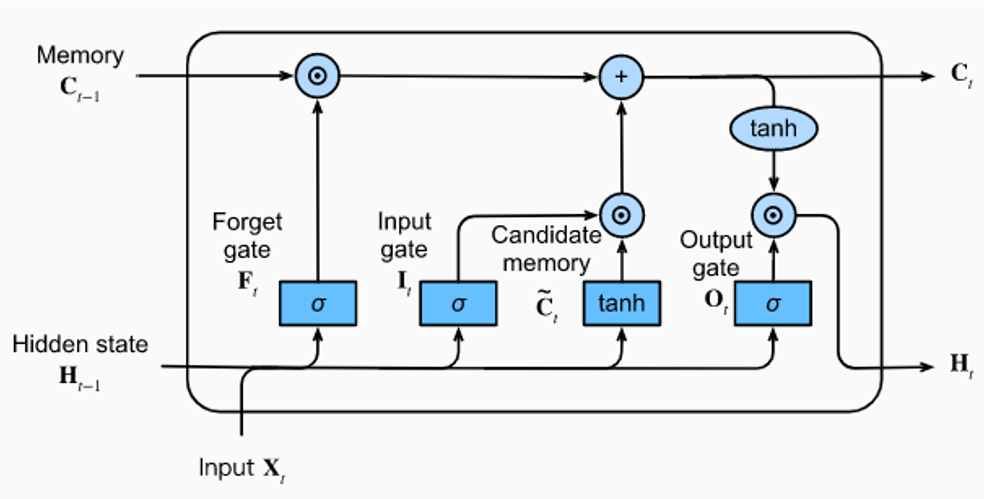
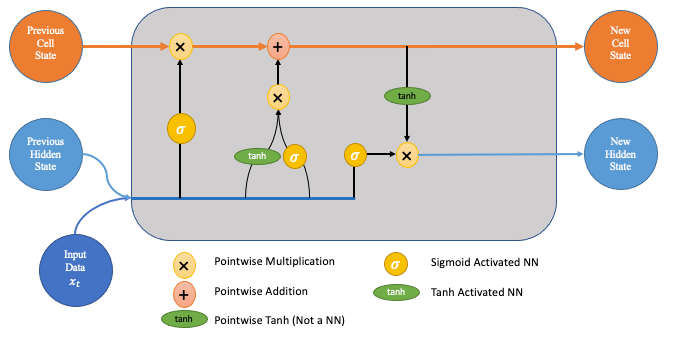

Odp.: LSTM wykorzystuję następujące elementy:
- pozwalają na zrównoleglenie obliczeń/ przetwarzania,
- wprowadzają machanizmy pamięci długotrwałej (ct),
- dostarczają dodatkową pamięć ct, która pozwala na przechowywanie szerszego kontekstu,
- wprowadzają dodatkowe bramki:
    - update gate - jak mocno opierać się na obecnych danych podczas aktualizacji hidden state,
    - forget gate - dostarcza informacji/ decyduje jakie dane z przeszłości zapomnieć,
    - output gate - decyduje jak bardzo opierać się komórce ct podczas aktulzazacji hidden state,